## **Dataset 1**

In [ ]:
# import require libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] =( 15,8) 

# read General1 dataset
df = pd.read_csv('/General/Data1.csv', parse_dates=True) #path to dataset
df.head()

,DATE,YEAR,EURO
0,01/01/2019,2019,8350
1,01/01/2019,2019,104
2,03/01/2019,2019,3666
3,03/01/2019,2019,1242
4,06/01/2019,2019,284


In [ ]:
df.tail()

,DATE,YEAR,EURO
2846,18/11/2021,2021,29
2847,22/11/2021,2021,600
2848,23/11/2021,2021,3735
2849,24/11/2021,2021,15
2850,29/11/2021,2021,10


In [ ]:
df.dtypes

DATE    object
YEAR     int64
EURO     int64
dtype: object

In [ ]:
# converting date column to pandas datetime column  
df['DATE'] = pd.to_datetime(df['DATE'], infer_datetime_format=True)
df.dtypes

DATE    datetime64[ns]
YEAR             int64
EURO             int64
dtype: object

In [ ]:
# setting date column as index
df.set_index('DATE', inplace=True)
df.head()

,YEAR,EURO
DATE,,
2019-01-01,2019,8350
2019-01-01,2019,104
2019-03-01,2019,3666
2019-03-01,2019,1242
2019-06-01,2019,284


## **Visualization**

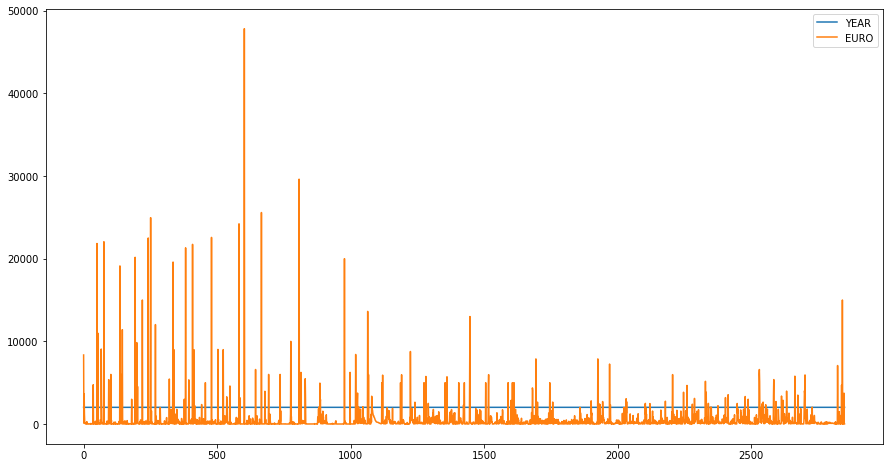

In [ ]:
df.plot()

Data looks seasonal

In [ ]:
# converting to monthly data
df['DATE'] = pd.to_datetime(df['DATE'])
df_month = df.groupby(pd.Grouper(key='DATE', freq='1M')).sum() # groupby each month
df_month.drop(['YEAR'], axis=1, inplace=True)
df_month.head()

,EURO
DATE,
2019-01-31,60654
2019-02-28,64397
2019-03-31,33131
2019-04-30,34339
2019-05-31,107863


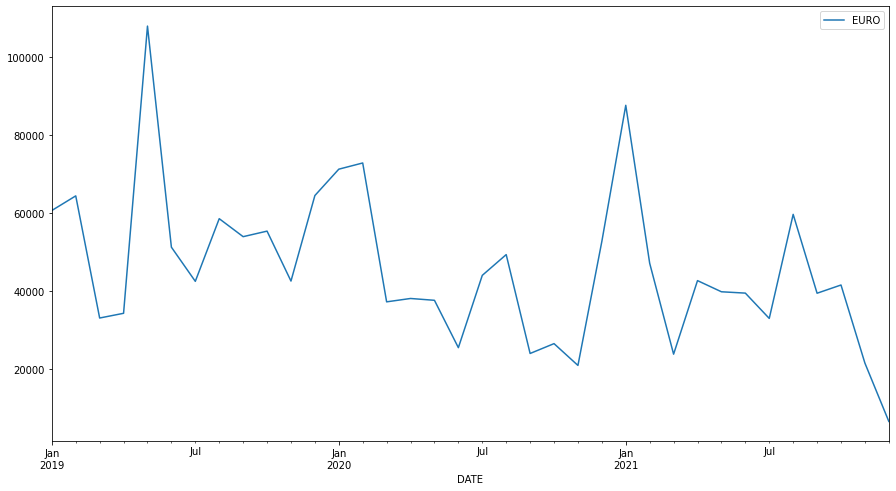

In [ ]:
df_month.plot()

<BarContainer object of 36 artists>

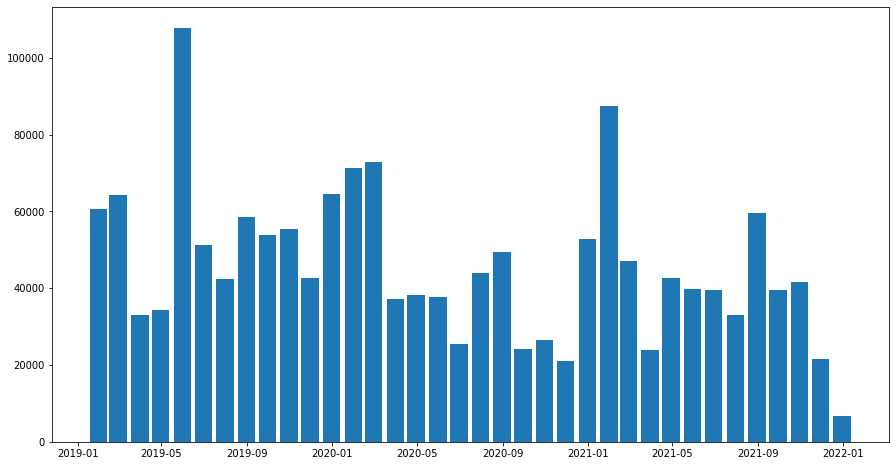

In [ ]:
# using subplot
fig, ax = plt.subplots()
  
# plotting bar graph
ax.bar(df_month['2019':].index, 
       df_month.loc['2019':, "EURO"], 
       width=25, align='center')

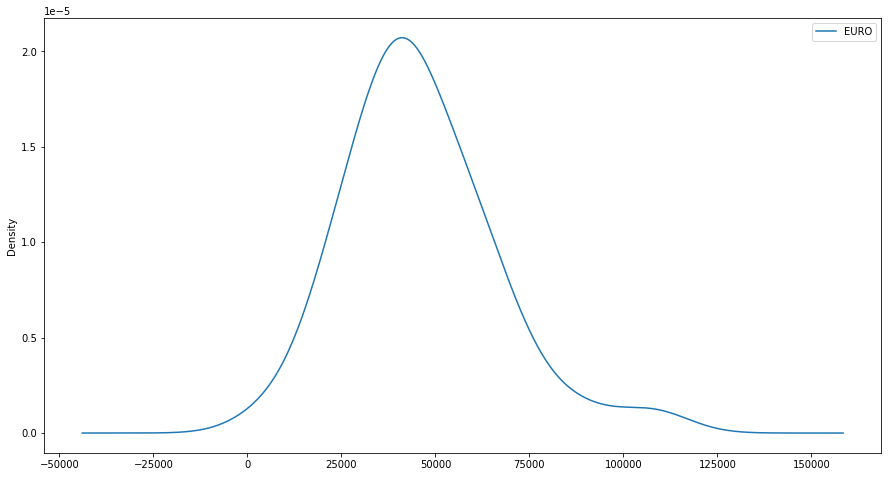

In [ ]:
df_month.plot(kind='kde')

Text(0, 0.5, 'Euro')

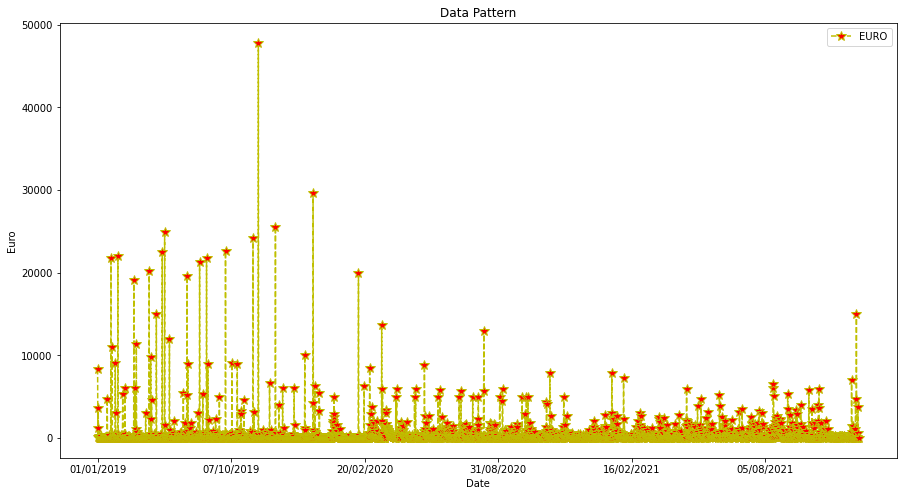

In [ ]:
df.plot(x='DATE',y='EURO',linestyle='--', marker='*', markerfacecolor='r',color='y',markersize=10)
plt.title('Data Pattern')
plt.xlabel('Date')
plt.ylabel('Euro')

## **Testing for stationarity**

In [ ]:
# rolling statisics on daily level
rolmean = (df.drop(['YEAR'], axis=1)).rolling(window=365).mean()
rolstd = (df.drop(['YEAR'], axis=1)).rolling(window=365).std()

print(rolmean, rolstd)

            EURO
0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
...          ...
2846  561.249315
2847  562.690411
2848  572.791781
2849  572.682192
2850  572.271233

[2851 rows x 1 columns]              EURO
0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
...           ...
2846  1302.057715
2847  1301.808014
2848  1312.067503
2849  1312.112539
2850  1312.265630

[2851 rows x 1 columns]


In [ ]:
# rolling statisics on monthly level
rolmeanM = df_month.rolling(window=12).mean()

rolstdM = df_month.rolling(window=12).std()

print(rolmeanM, rolstdM)

                    EURO
DATE                    
2019-01-31           NaN
2019-02-28           NaN
2019-03-31           NaN
2019-04-30           NaN
2019-05-31           NaN
2019-06-30           NaN
2019-07-31           NaN
2019-08-31           NaN
2019-09-30           NaN
2019-10-31           NaN
2019-11-30           NaN
2019-12-31  55761.500000
2020-01-31  56643.000000
2020-02-29  57344.916667
2020-03-31  57689.833333
2020-04-30  58006.000000
2020-05-31  52156.250000
2020-06-30  50012.666667
2020-07-31  50140.000000
2020-08-31  49373.666667
2020-09-30  46881.833333
2020-10-31  44481.666667
2020-11-30  42681.833333
2020-12-31  41703.750000
2021-01-31  43066.250000
2021-02-28  40927.166667
2021-03-31  39811.083333
2021-04-30  40192.083333
2021-05-31  40374.000000
2021-06-30  41537.750000
2021-07-31  40619.166667
2021-08-31  41477.416667
2021-09-30  42762.750000
2021-10-31  44013.500000
2021-11-30  44062.916667
2021-12-31  40221.916667                     EURO
DATE                    


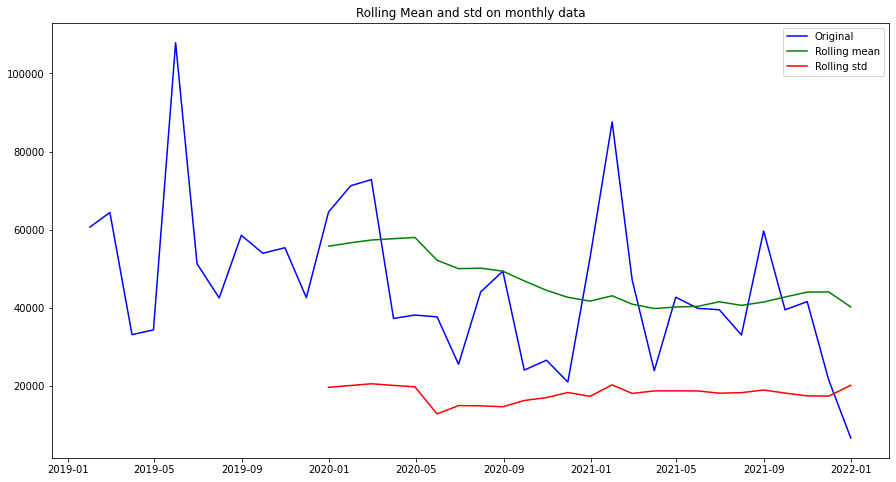

In [ ]:
# plot rolling stats
orig = plt.plot(df_month, color = 'blue', label = 'Original')
mean = plt.plot(rolmeanM, color = 'green', label = 'Rolling mean')
std = plt.plot( rolstdM, color = 'red', label = 'Rolling std')
plt.legend(loc='best')
plt.title('Rolling Mean and std on monthly data')
plt.show(block=False)

In [ ]:
# Dicket fuller on daily level

from statsmodels.tsa.stattools import adfuller

test_result = adfuller(df['EURO'], autolag='AIC')

#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(column):
    result=adfuller(column)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

adfuller_test(df['EURO'])

ADF Test Statistic : -51.74916015489026
p-value : 0.0
#Lags Used : 0
Number of Observations Used : 2850
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [ ]:
# Dicket fuller on monthly level

from statsmodels.tsa.stattools import adfuller

test_result = adfuller(df_month['EURO'], autolag='AIC')

#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(column):
    result=adfuller(column)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

adfuller_test(df_month['EURO'])

ADF Test Statistic : -4.1909576941284525
p-value : 0.0006825113194225437
#Lags Used : 0
Number of Observations Used : 35
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


Data is stationary, continue with ARIMA & SARIMA model creation

## **Seasonal diffrencing to find value of p d q for ARIMA model**

In [ ]:
# Sessonal differencing

df_month['Seasonal_First_Difference']=df_month['EURO']-df_month['EURO'].shift(12)
df_month.head(20)

,EURO,Seasonal_First_Difference
DATE,,
2019-01-31,60654,NaN
2019-02-28,64397,NaN
2019-03-31,33131,NaN
2019-04-30,34339,NaN
2019-05-31,107863,NaN
2019-06-30,51264,NaN
2019-07-31,42522,NaN
2019-08-31,58560,NaN
2019-09-30,53956,NaN


In [ ]:
adfuller_test(df_month['Seasonal_First_Difference'].dropna())

ADF Test Statistic : -7.229868263053485
p-value : 2.0077059771089618e-10
#Lags Used : 1
Number of Observations Used : 33
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


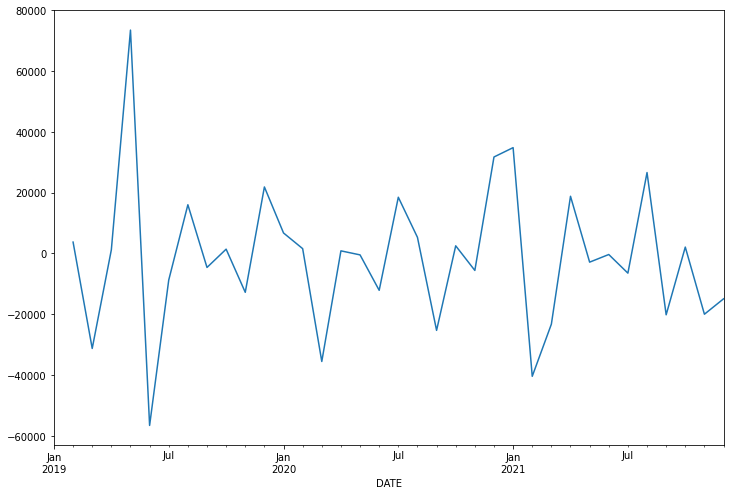

In [ ]:
df_month['Seasonal_First_Difference'].plot(figsize=(12,8))

## **Auto Regressive Model**

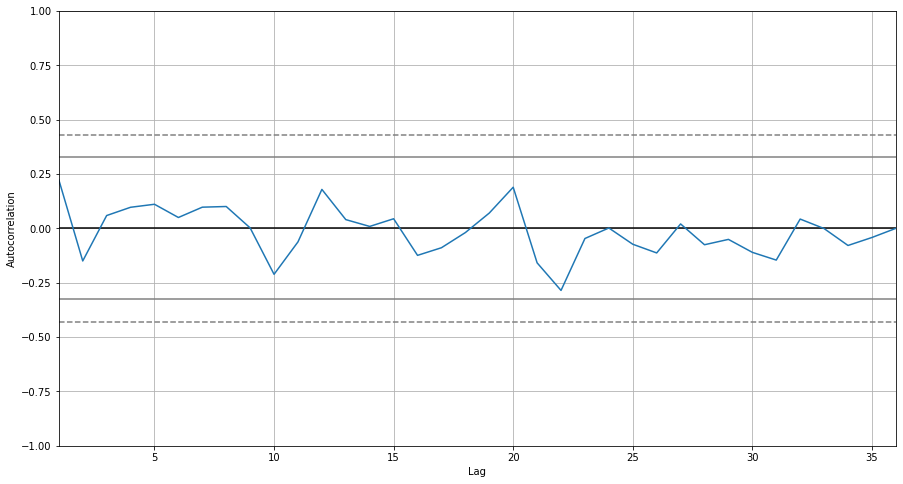

In [ ]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df_month['EURO'])
plt.show()

## **Autocorrelation and Partial Autocorrelation**

Identification of an AR model is often best done with the PACF.
-For an AR model, the theoretical PACF “shuts off” past the order of the model. The phrase “shuts off” means that in theory the partial autocorrelations are equal to 0 beyond that point. Put another way, the number of non-zero partial autocorrelations gives the order of the AR model. By the “order of the model” we mean the most extreme lag of x that is used as a predictor.


Identification of an MA model is often best done with the ACF rather than the PACF.
-For an MA model, the theoretical PACF does not shut off, but instead tapers toward 0 in some manner. A clearer pattern for an MA model is in the ACF. The ACF will have non-zero autocorrelations only at lags involved in the model.

p,d,q = AR model lags, differencing , MA lags

/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


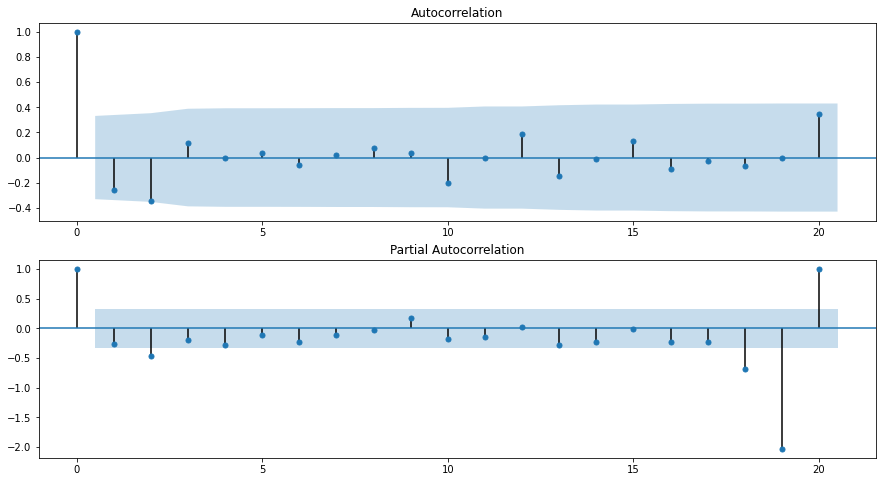

In [ ]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

fig = plt.figure()
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_month['Seasonal_First_Difference'].dropna(),lags=20,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_month['Seasonal_First_Difference'].dropna(),lags=20,ax=ax2)

From here select p = 1, q = 0  or 1, d = 1

## **Arima Model**

In [ ]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
from statsmodels.tsa.arima_model import ARIMA

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
model=ARIMA(df_month['EURO'],order=(1,1,0)) # p d q
model_fit=model.fit()

In [ ]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                 D.EURO   No. Observations:                   35
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -400.939
Method:                       css-mle   S.D. of innovations          22822.142
Date:                Mon, 10 Jan 2022   AIC                            807.878
Time:                        09:54:52   BIC                            812.544
Sample:                    02-28-2019   HQIC                           809.488
                         - 12-31-2021                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1542.7715   3089.149     -0.499      0.621   -7597.393    4511.850
ar.L1.D.EURO    -0.2562      0.161     -1.588      0.122      -0.573       0.060
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -3.9031           +0.0000j            3.9031            0.5000
-----------------------------------------------------------------------------
"""

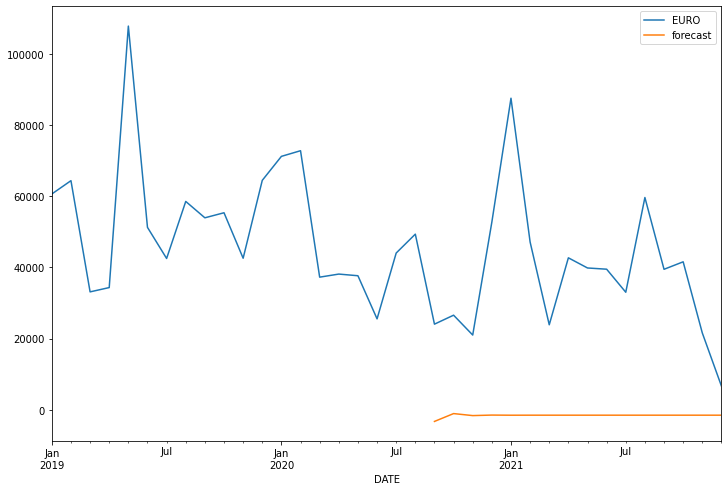

In [ ]:
df_month['forecast']=model_fit.predict(start=20,end=90,dynamic=True)
df_month[['EURO','forecast']].plot()

Since Arima is for  non-seasonal data it doesn't work well

## **Seasonal Arimax**

In [ ]:
import statsmodels.api as sm

model=sm.tsa.statespace.SARIMAX(df_month['EURO'],order=(1, 1, 0),seasonal_order=(1,1,0,12))
results=model.fit()

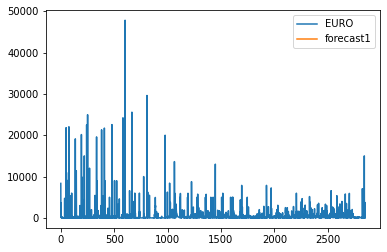

In [ ]:
df['forecast1']=results.predict(start=20,end=90,dynamic=True)
df[['EURO','forecast1']].plot()

In [ ]:
from pandas.tseries.offsets import DateOffset
future_dates=[df_month.index[-1]+ DateOffset(months=x)for x in range(0,13)]

In [ ]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df_month.columns)

In [ ]:
future_datest_df.tail()

,EURO,Seasonal_First_Difference
2022-08-31,NaN,NaN
2022-09-30,NaN,NaN
2022-10-31,NaN,NaN
2022-11-30,NaN,NaN
2022-12-31,NaN,NaN


In [ ]:
future_df=pd.concat([df_month,future_datest_df])

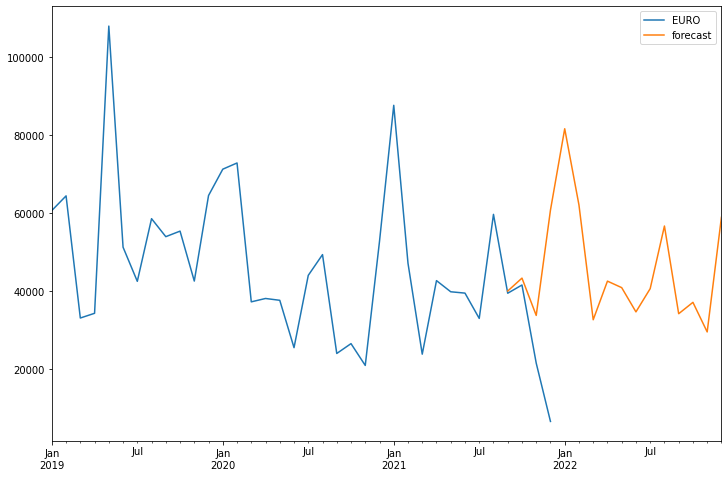

In [ ]:
future_df['forecast'] = results.predict(start = 32, end = 120, dynamic= True)  
future_df[['EURO', 'forecast']].plot() 

In [ ]:
future_df

,EURO,Seasonal_First_Difference,forecast
2019-01-31,60654,NaN,NaN
2019-02-28,64397,3743.0,NaN
2019-03-31,33131,-31266.0,NaN
2019-04-30,34339,1208.0,NaN
2019-05-31,107863,73524.0,NaN
2019-06-30,51264,-56599.0,NaN
2019-07-31,42522,-8742.0,NaN
2019-08-31,58560,16038.0,NaN
2019-09-30,53956,-4604.0,NaN
2019-10-31,55375,1419.0,NaN


## **Test Prediction**

In [ ]:
print("Prediction on March 2022", future_df.loc['2022-12-31'])


Prediction on March 2022 EURO                             NaN
Seasonal_First_Difference        NaN
forecast                     58915.6
Name: 2022-12-31 00:00:00, dtype: object


In [ ]:
future_df.columns

Index(['EURO', 'Seasonal_First_Difference', 'forecast'], dtype='object')

In [ ]:
future_df.index.rename('DATE', inplace=True)

In [ ]:
future_df = future_df.reset_index()

In [ ]:
future_df

,DATE,EURO,Seasonal_First_Difference,forecast
0,2019-01-31,60654,NaN,NaN
1,2019-02-28,64397,3743.0,NaN
2,2019-03-31,33131,-31266.0,NaN
3,2019-04-30,34339,1208.0,NaN
4,2019-05-31,107863,73524.0,NaN
5,2019-06-30,51264,-56599.0,NaN
6,2019-07-31,42522,-8742.0,NaN
7,2019-08-31,58560,16038.0,NaN
8,2019-09-30,53956,-4604.0,NaN
9,2019-10-31,55375,1419.0,NaN


In [ ]:
future_df.to_csv('Future_results.csv')